In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("my_cleaned forest data.csv")

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
#encoding of categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 22.0 KB


In [11]:
#independent and dependent featuers
x=df.drop('FWI',axis=1)
y=df['FWI']  #--FWI as the output(dependent feature)

In [12]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [14]:
#Train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [16]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,1,0
152,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,0,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0,1
178,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,1,1
224,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,1,1
230,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,1,1


In [17]:
y_train

97      0.9
141     0.3
192    21.6
68      2.6
119     0.9
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 182, dtype: float64

In [18]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
162     0.8
178     9.0
224     3.9
230    15.4
154     5.2
Name: FWI, Length: 61, dtype: float64

In [19]:
#feature selection based on correlation
correlation=x_train.corr()
correlation

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

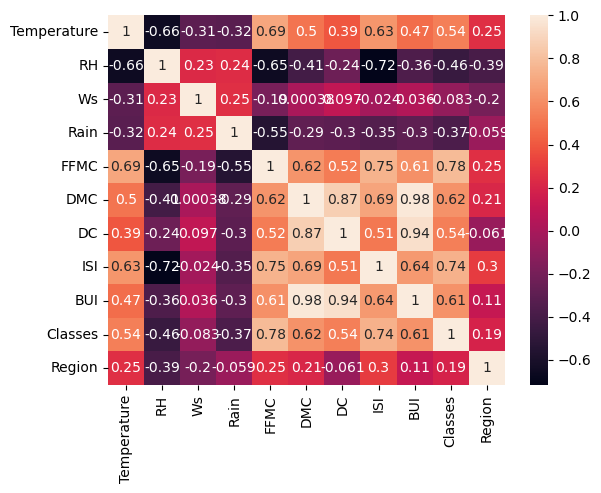

In [20]:
#check for multi collinearity
plt.Figure(figsize=(12,5))
sb.heatmap(correlation,annot=True)

In [ ]:
#find the black patches 

In [22]:
def coorelation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

#threshlod domain expertise

In [24]:
cor_val=coorelation(x_train,0.85)
cor_val

{'BUI', 'DC'}

In [25]:
#dropping features when the coorelation is more than threshold
x_train.drop(cor_val,axis=1,inplace=True)
x_test.drop(cor_val,axis=1,inplace=True)

x_train.shape,x_test.shape

((182, 9), (61, 9))

In [26]:
# Feature Scaling and Standardization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [27]:
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

In [28]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'x_train after training')

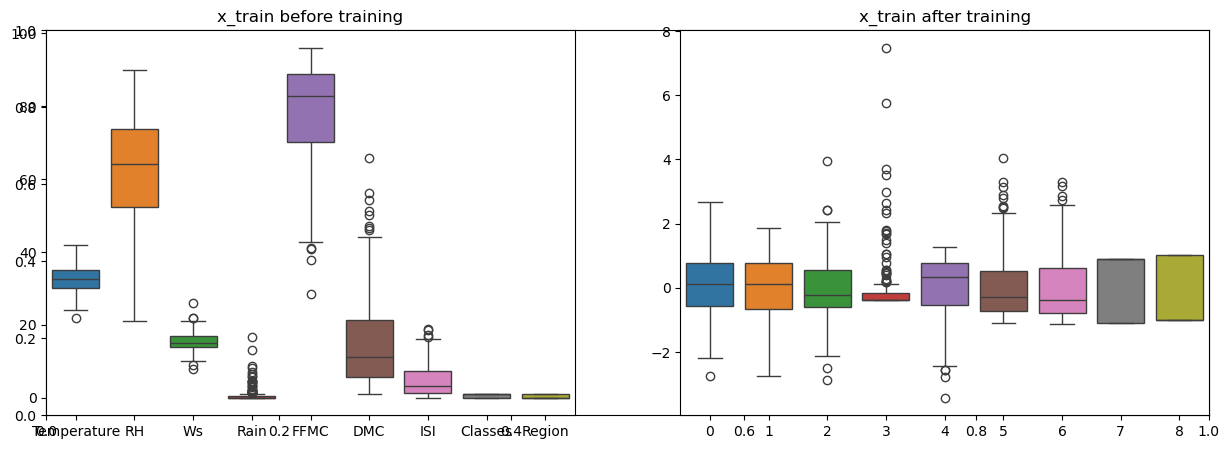

In [29]:
#Boxplots to understand the effect of standardscalar
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(data=x_train)
plt.title("x_train before training")

plt.subplot(1,2,2)
sb.boxplot(data=x_train_scaled)
plt.title("x_train after training")



MAE: 0.5468236465249976
R2 score: 0.9847657384266951


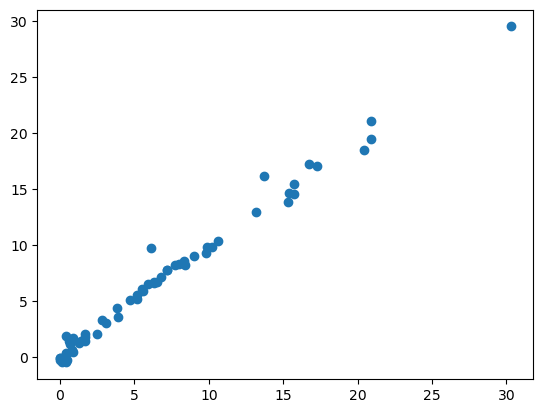

In [30]:
#linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

LR=LinearRegression()
LR.fit(x_train_scaled,y_train)
y_pred=LR.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("MAE:",mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

MAE: 1.1331759949144085
R2 score: 0.9492020263112388


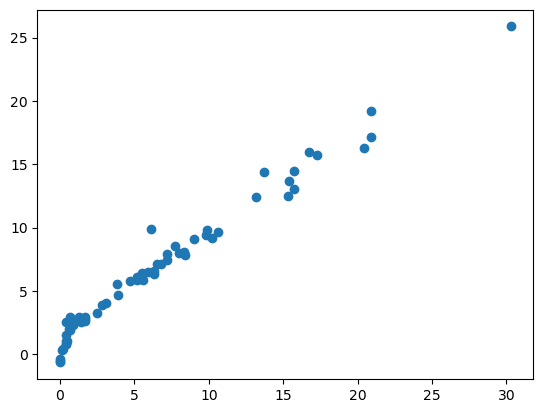

In [31]:
#lasso regression model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("MAE:",mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

In [32]:
#cross validation with lasso

from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [35]:
lassocv.alpha_

0.05725391318234408